In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",header=None)
x

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597
...,...,...,...,...,...
382,0.684004,2.320728,0.380965,-1.050408,-0.151801
383,-0.430455,2.097191,0.379874,0.135858,-1.400176
384,-0.457141,0.940791,-0.660270,2.325658,-1.510055
385,-0.344278,-1.209805,-2.119721,-1.485907,-0.167689


In [7]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


# Линейная регрессия

In [11]:
binary = LinearRegression() # модель линейной регрессии
type(x[[1]])
binary.fit(x[[1]], y) # обучение
binary.coef_ # коэффициенты b

array([[95.52010745]])

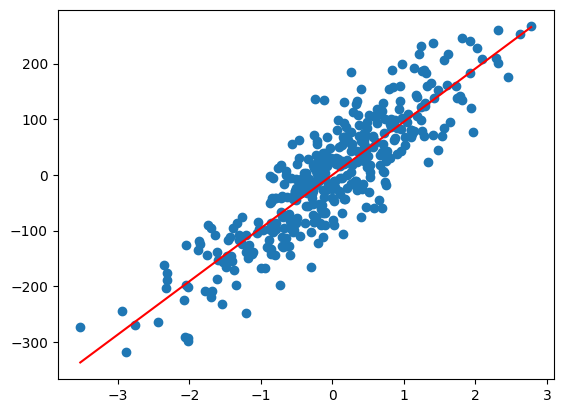

In [15]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1)) # равномерное распределение точек х
plt.scatter(x[1], y)
plt.plot(xx, binary.predict(xx), c='r')

In [17]:
binary.score(x[[1]], y) # эффективность модели через коэффициент детерминации

0.7699743283650629

# Множественная регрессия

In [18]:
multiple = LinearRegression()
multiple.fit(x, y) # обучение на полном датасете х
multiple.score(x, y)

0.9922198026415868

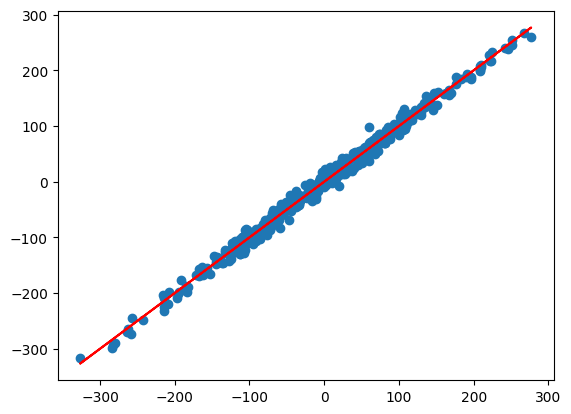

In [19]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r') # график отличия предсказанных значений от реальных

# ДЗ

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.


In [21]:
second = LinearRegression() # модель для x[2]
second.fit(x[[2]], y) # обучение
second.score(x[[2]],y)

0.18794528514998887

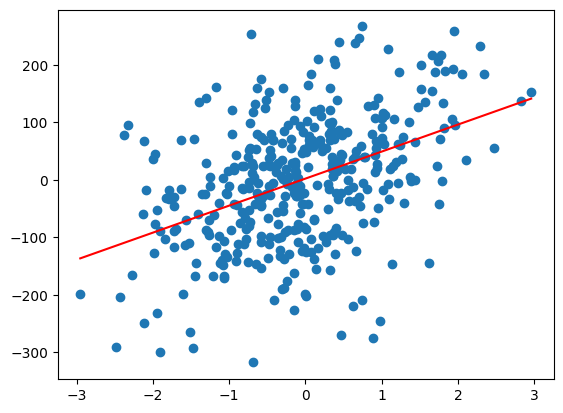

In [26]:
x2 = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1)) # равномерное распределение точек х
plt.scatter(x[2], y)
plt.plot(x2, second.predict(x2), c='r')

In [23]:
third = LinearRegression() # модель для х3
third.fit(x[[3]],y)
third.score(x[[3]],y)

0.047470345664983093

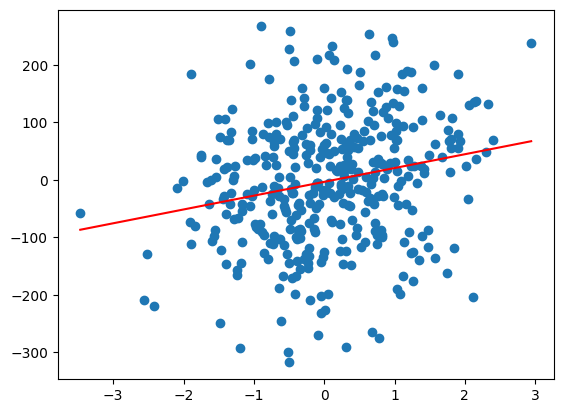

In [27]:
x3 = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1)) # равномерное распределение точек х
plt.scatter(x[3], y)
plt.plot(x3, third.predict(x3), c='r')

In [30]:
f = LinearRegression() # модель для х4
f.fit(x[[4]],y)
f.score(x[[4]],y)

0.00017176151145947838

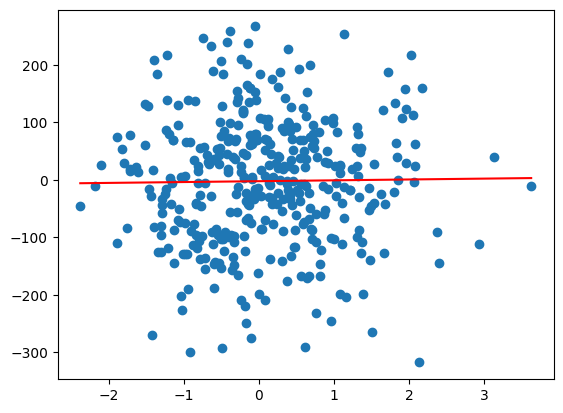

In [28]:
x4 = np.linspace(x[4].min(), x[4].max(), 100).reshape((-1,1)) # равномерное распределение точек х
plt.scatter(x[4], y)
plt.plot(x4, f.predict(x4), c='r')

In [31]:
z = LinearRegression() # модель для х0
z.fit(x[[0]],y)
z.score(x[[0]],y)

0.04364336234689348

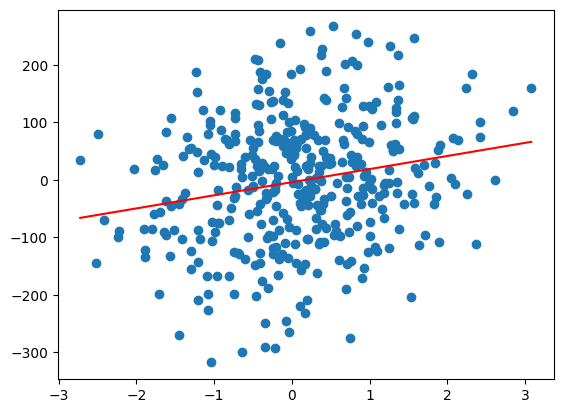

In [32]:
x0 = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1,1)) # равномерное распределение точек х
plt.scatter(x[0], y)
plt.plot(x0, z.predict(x0), c='r')

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pf=PolynomialFeatures(2)
# для 2 порядка
X_poly=pf.fit_transform(np.array(x[1]).reshape(-1,1)) # переделывает х
model = LinearRegression()
model.fit(X_poly, y)
model.score(X_poly,y)
pred2 = model.predict(X_poly)
s2 = model.score(X_poly,y)
s2

0.7699942588883133

In [54]:
pf=PolynomialFeatures(3)
# для 3 порядка
X_poly=pf.fit_transform(np.array(x[1]).reshape(-1,1)) # переделывает х
model = LinearRegression()
model.fit(X_poly, y)
pred3 = model.predict(X_poly)
s3 = model.score(X_poly,y)
s3

0.7711184109235

In [56]:
pf=PolynomialFeatures(10)
# для 10 порядка
X_poly=pf.fit_transform(np.array(x[1]).reshape(-1,1)) # переделывает х
model = LinearRegression()
model.fit(X_poly, y)
pred10 = model.predict(X_poly)

s10 = model.score(X_poly,y)
s10

0.7726769307411921

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [51]:
table = pd.DataFrame({'2 порядка':[s2], '3 порядка':[s3], '10 порядка': [s10]})
table

,2 порядка,3 порядка,10 порядка
0,0.769994,0.771118,0.772677


Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [61]:
mse_2 = mean_squared_error(y, pred2)
mse_3 = mean_squared_error(y, pred3)
mse_10 = mean_squared_error(y, pred10)

mae_2 = mean_absolute_error(y, pred2)
mae_3 = mean_absolute_error(y, pred3)
mae_10 = mean_absolute_error(y, pred10)

print(f'MSE: {mse_2, mse_3,mse_10}\nMAE: {mae_2, mae_3, mae_10}')

MSE: (2763.909752818907, 2750.4011562130727, 2731.672892721644)
MAE: (42.13230334691435, 42.06124777927377, 41.69087075925784)
